# 向量测量

## 1. 向量乘法

向量相乘有两种方法: **点积** ($u \cdot v$) 和**向量积** ($u \times v$)

对于数 (标量) 来说, 这两种运算含义相同, 但对于向量来说, 这两种运算的含义完全不同:
- 点积取两个向量并返回一个数 (标量)
- 向量积取两个向量并返回一个新向量

点积和向量积都可以推断出三维空间中向量的长度和方向

### 1.1. 点积

点积 (也叫内积) 是对两个向量的运算, 返回一个标量.

换句话说给定两个向量 $u$ 和 $v$, 那么 $u \cdot v$ 的结果是实数.

点积适用于二维, 三维等任意维度的向量. 它可以被看作测量输入向量对的 **对齐程度**.

**知识**: 计算两个向量的点积

In [2]:
from common.vector import Vector


def dot(u: Vector, v: Vector) -> float:
    """计算两个 N 维向量的点积

    Args:
        `u` (`Vector`): 向量 1
        `v` (`Vector`): 向量 2

    Returns:
        `float`: 向量点积
    """
    return sum([coord1 * coord2 for coord1, coord2 in zip(u, v)])

In [3]:
from common.vector import dot

# 定义两个二维向量
u, v = (1, 1), (2, 2)
print(f"u={u}, v={v}")

# 对两个向量进行点积计算
r = dot(u, v)

# 输出计算结果
print(f"u·v={r}")

u=(1, 1), v=(2, 2)
u·v=4


**知识:** 大致对齐的两个向量给出一个大的正点积

指向相似方向的两个向量的点积为正, 并且向量越大, 乘积就越大

u=(3.7, 1.8), v=(4.3, 2.5)
u·v=20.41


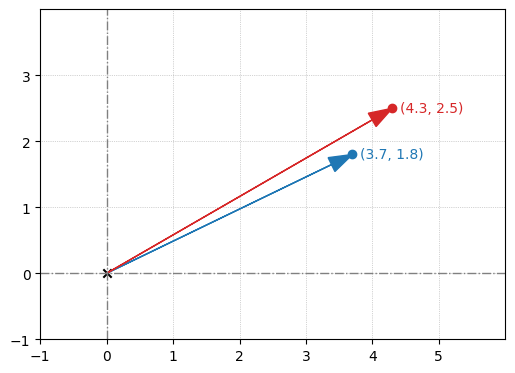

In [4]:
from common.vector import dot
from draw.component import Points2D, Arrow2D, Color, draw2d

# 定义两个向量
u, v = (3.7, 1.8), (4.3, 2.5)
print(f"u={u}, v={v}")

# 计算向量的点积
r = dot(u, v)
print(f"u·v={r}")

# 绘制向量
draw2d(
    [
        Points2D([u], color=Color.blue()),
        Points2D([v], color=Color.red()),
        Arrow2D(u, color=Color.blue()),
        Arrow2D(v, color=Color.red()),
    ]
)

u=(3.7, 1.8, 2.2), v=(4.3, 2.5, 3.0)
u·v=27.01


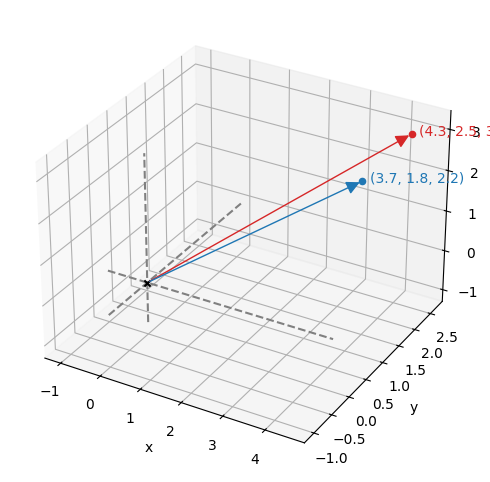

In [5]:
from common.vector import dot
from draw.component import Points3D, Arrow3D, Color, draw3d

# 定义两个向量
u, v = (3.7, 1.8, 2.2), (4.3, 2.5, 3.0)
print(f"u={u}, v={v}")

# 计算向量的点积
r = dot(u, v)
print(f"u·v={r}")

# 绘制向量
draw3d(
    [
        Points3D([u], color=Color.blue()),
        Points3D([v], color=Color.red()),
        Arrow3D(u, color=Color.blue()),
        Arrow3D(v, color=Color.red()),
    ]
)

指向相似方向的两个较短向量, 点积较小但仍为正

u=(-1.9, 0.7), v=(-1.7, 1)
u·v=4


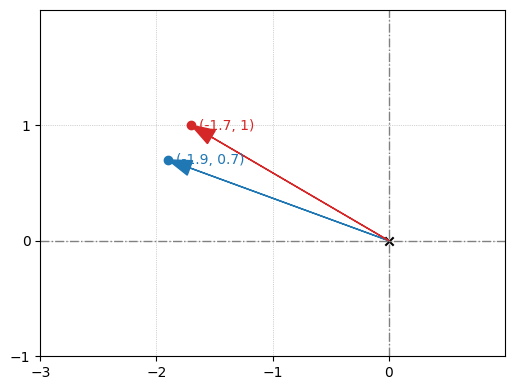

In [6]:
from common.vector import dot
from draw.component import Arrow2D, Color, Points2D, draw2d

# 定义两个向量
u, v = (-1.9, 0.7), (-1.7, 1)
print(f"u={u}, v={v}")

# 计算向量的点积
r = round(dot(u, v))
print(f"u·v={r}")

# 绘制向量
draw2d(
    [
        Points2D([u], color=Color.blue()),
        Points2D([v], color=Color.red()),
        Arrow2D(u, color=Color.blue()),
        Arrow2D(v, color=Color.red()),
    ]
)

u=(-1.9, 0.7, 1.2), v=(-1.7, 1, 2)
u·v=6.33


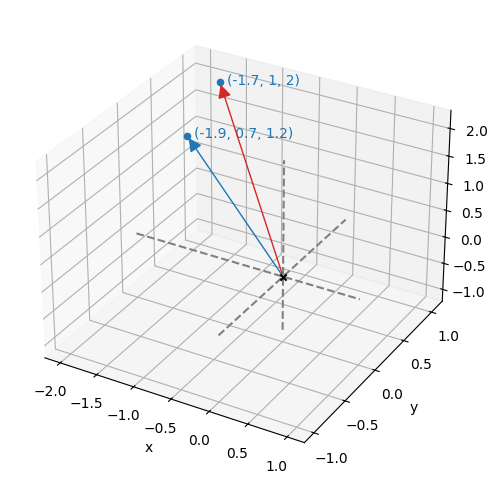

In [7]:
from common.vector import dot
from draw.component import Arrow3D, Color, Points3D, draw3d

# 定义两个向量
u, v = (-1.9, 0.7, 1.2), (-1.7, 1, 2)
print(f"u={u}, v={v}")

# 计算向量的点积
r = dot(u, v)
print(f"u·v={r}")

# 绘制向量
draw3d(
    [
        Points3D([u], color=Color.blue()),
        Points3D([v], color=Color.blue()),
        Arrow3D(u, color=Color.blue()),
        Arrow3D(v, color=Color.red()),
    ]
)

**知识:** 点积为负数的两个向量方向相反

如果两个向量指向相反或大致相反的方向, 则其点积为负

向量越长, 则点积的负值越小

u=(3.5, 2), v=(-2.2, -2)
u·v=-12


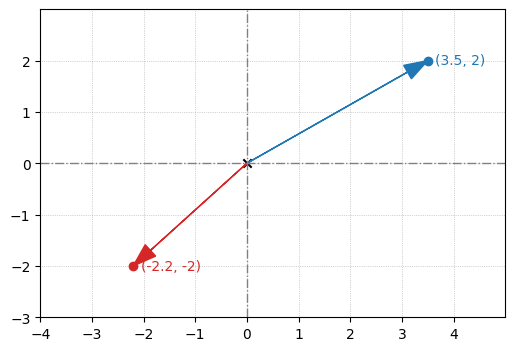

In [8]:
from common.vector import dot
from draw.component import Arrow2D, Color, Points2D, draw2d

# 定义两个向量
u, v = (3.5, 2), (-2.2, -2)
print(f"u={u}, v={v}")

# 计算向量的点积
r = round(dot(u, v))
print(f"u·v={r}")

# 绘制向量
draw2d(
    [
        Points2D([u], color=Color.blue()),
        Points2D([v], color=Color.red()),
        Arrow2D(u, color=Color.blue()),
        Arrow2D(v, color=Color.red()),
    ]
)

u=(3.5, 2, 1.2), v=(-2.2, -2, -2.1)
u·v=-14.22


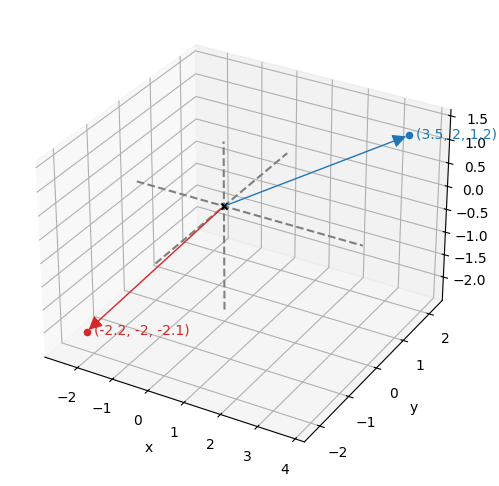

In [9]:
from common.vector import dot
from draw.component import Arrow3D, Color, Points3D, draw3d

# 定义两个向量
u, v = (3.5, 2, 1.2), (-2.2, -2, -2.1)
print(f"u={u}, v={v}")

# 计算向量的点积
r = dot(u, v)
print(f"u·v={r}")

# 绘制向量
draw3d(
    [
        Points3D([u], color=Color.blue()),
        Points3D([v], color=Color.red()),
        Arrow3D(u, color=Color.blue()),
        Arrow3D(v, color=Color.red()),
    ]
)

指向相反方向的较短向量, 点积较大但仍为负数

u=(-1.4, 3.8), v=(0.9, -0.3)
u·v=-2.4


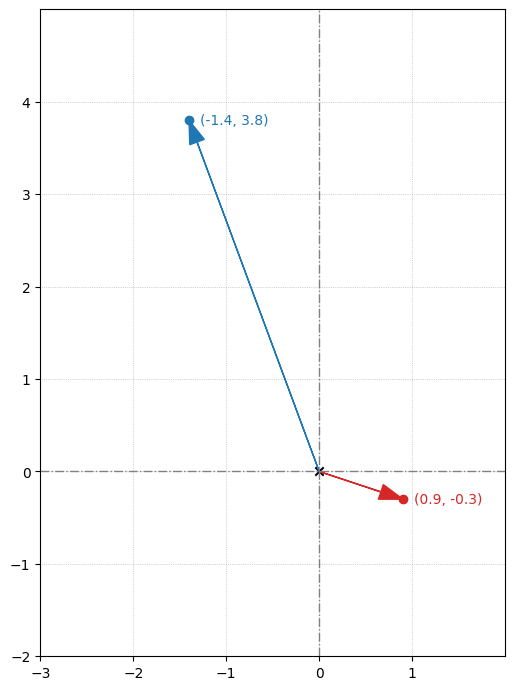

In [10]:
from common.vector import dot
from draw.component import Arrow2D, Color, Points2D, draw2d

# 定义两个向量
u, v = (-1.4, 3.8), (0.9, -0.3)
print(f"u={u}, v={v}")

# 计算向量的点积
r = dot(u, v)
print(f"u·v={r}")

# 绘制向量
draw2d(
    [
        Points2D([u], color=Color.blue()),
        Points2D([v], color=Color.red()),
        Arrow2D(u, color=Color.blue()),
        Arrow2D(v, color=Color.red()),
    ]
)

u=(-1.4, 3.8, 0.4), v=(0.9, -0.3, -1.2)
u·v=-2.88


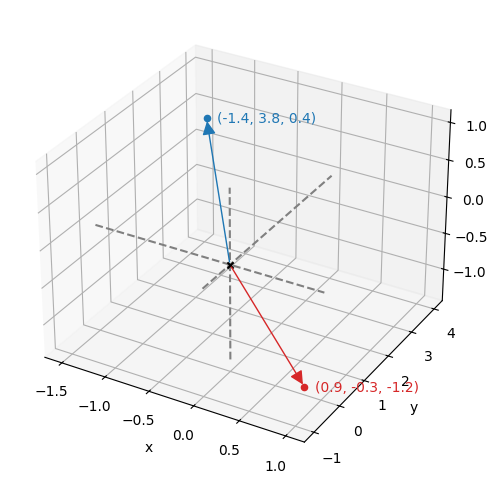

In [11]:
from common.vector import dot
from draw.component import Arrow3D, Color, Points3D, draw3d

# 定义两个向量
u, v = (-1.4, 3.8, 0.4), (0.9, -0.3, -1.2)
print(f"u={u}, v={v}")

# 计算向量的点积
r = dot(u, v)
print(f"u·v={r}")

# 绘制向量
draw3d(
    [
        Points3D([u], color=Color.blue()),
        Points3D([v], color=Color.red()),
        Arrow3D(u, color=Color.blue()),
        Arrow3D(v, color=Color.red()),
    ]
)

**知识:** 点积为 `0` 的两个向量相互垂直

如果两个向量的方向完全垂直, 那么无论它们的长度如何, 点积都是零

这是点积最重要的应用之一: 
- 在不做任何三角运算的情况下, 计算两个向量是否垂直
- 如果两个向量的夹角小于 `90°`, 则向量的点积为正
- 如果夹角大于 `90°`, 则向量的点积为负

u=(-2, 3.6), v=(1.8, 1)
u·v=0.0


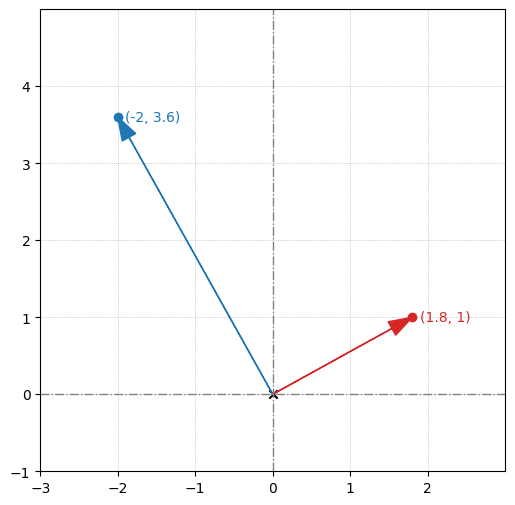

In [12]:
from common.vector import dot
from draw.component import Arrow2D, Color, Points2D, draw2d

# 定义两个向量
u, v = (-2, 3.6), (1.8, 1)
print(f"u={u}, v={v}")

# 计算向量的点积
r = dot(u, v)
print(f"u·v={r}")

# 绘制向量
draw2d(
    [
        Points2D([u], color=Color.blue()),
        Points2D([v], color=Color.red()),
        Arrow2D(u, color=Color.blue()),
        Arrow2D(v, color=Color.red()),
    ]
)

u=(-2, 3.2, 1.6), v=(1.8, -1.2, 4.65)
u·v=0


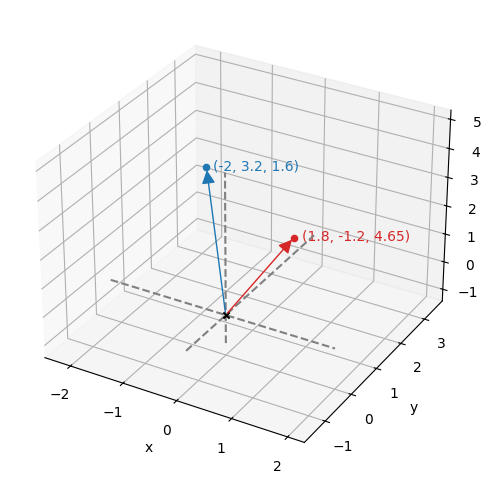

In [13]:
from common.vector import dot
from draw.component import Arrow3D, Color, Points3D, draw3d

# 定义两个向量
u, v = (-2, 3.2, 1.6), (1.8, -1.2, 4.65)
print(f"u={u}, v={v}")

# 计算向量的点积
r = round(dot(u, v))
print(f"u·v={r}")

# 绘制向量
draw3d(
    [
        Points3D([u], color=Color.blue()),
        Points3D([v], color=Color.red()),
        Arrow3D(u, color=Color.blue()),
        Arrow3D(v, color=Color.red()),
    ]
)

**练习:** 位于不同轴上的两个向量的点积为零, 说明它们是互相垂直的

对于 `(1, 0)` 和 `(0, 2)` 的点积, 点积结果为 `0`, 说明这两个向量相互垂直

u=(1, 0), v=(0, 2)
u·v=0


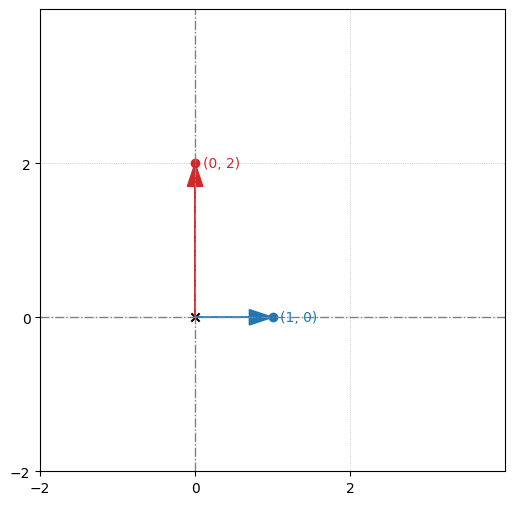

In [14]:
from common.vector import dot
from draw.component import Arrow2D, Color, Points2D, draw2d

# 定义两个二维向量
u, v = (1, 0), (0, 2)
print(f"u={u}, v={v}")

# 计算二维向量的点积
r = dot(u, v)
print(f"u·v={r}")

# 绘制相互垂直的二维向量
draw2d(
    [
        Points2D([u], color=Color.blue()),
        Points2D([v], color=Color.red()),
        Arrow2D(u, color=Color.blue()),
        Arrow2D(v, color=Color.red()),
    ],
    grid=(2, 2),
)

对于 `(0, 3, 0)` 和 `(0, 0, -5)` 的点积, 点积结果为 `0`, 说明这两个向量相互垂直

三维空间的向量垂直很难直接从坐标系上观察到, 用点积可以更容易得到结论

u=(0, 3, 0), v=(0, 0, -5)
u·v=0


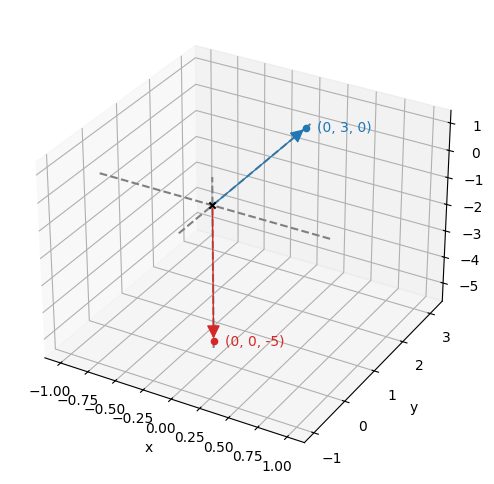

In [15]:
from common.vector import dot
from draw.component import Arrow3D, Color, Points3D, draw3d

# 定义两个三维向量
u, v = (0, 3, 0), (0, 0, -5)
print(f"u={u}, v={v}")

# 计算三维向量的点积
r = dot(u, v)
print(f"u·v={r}")

# 绘制相互垂直的三维向量
draw3d(
    [
        Points3D([u], color=Color.blue()),
        Points3D([v], color=Color.red()),
        Arrow3D(u, color=Color.blue()),
        Arrow3D(v, color=Color.red()),
    ]
)

**练习:** `(-1, -1, 1)` 和 `(1, 2, 1)` 的点积是多少? 这两个三维向量的夹角是大于 `90°`, 小于 `90°`, 还是正好等于 `90°`?

u=(-1, -1, 1), v=(1, 2, 1)
u·v=-2


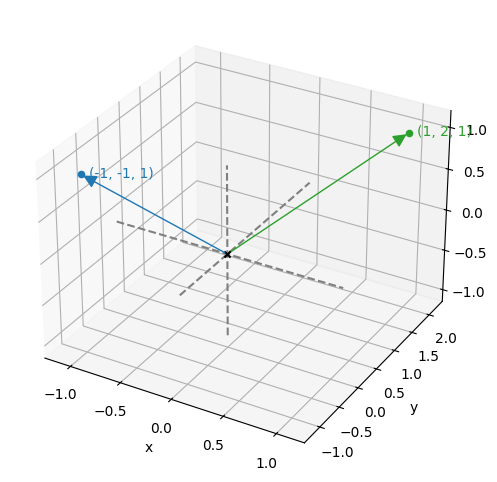

In [16]:
from common.vector import dot
from draw.component import Arrow3D, Color, Points3D, draw3d

u, v = (-1, -1, 1), (1, 2, 1)
print(f"u={u}, v={v}")

# 点积结果为 -2, 为负数, 说明两个向量方向相反, 大于 90°
r = dot(u, v)
print(f"u·v={r}")

draw3d(
    [
        Points3D([u], color=Color.blue()),
        Arrow3D(u, color=Color.blue()),
        Points3D([v], color=Color.green()),
        Arrow3D(v, color=Color.green()),
    ]
)

**练习:** 向量越长, 其点积的绝对值越大

对于二维向量 `(3, 4)` 和 `(2, 3)`, 将其任意一个向量放大 `2` 倍, 测量其点积的变化

In [17]:
from common.vector import dot, scale

# 定义两个二维向量
u, v = (3, 4), (2, 3)
print(f"u={u}, v={v}")

# 计算原始点积
r1 = dot(u, v)
print(f"u·v={r1}")

# 将 u 向量放大 2 倍, 检查点积是否也放大 2 倍
r2 = dot(scale(2, u), v)
print(f"(2u)·v={r2}")

# 将 v 向量放大 2 倍, 检查点积是否也放大 2 倍
r3 = dot(u, scale(2, v))
print(f"u·(2v)={r3}")

u=(3, 4), v=(2, 3)
u·v=18
(2u)·v=36
u·(2v)=36


对于三维向量 `(3, 4, 5)` 和 `(2, 3, 4)`, 将其任意一个向量放大 `2` 倍, 测量其点积的变化

In [18]:
from common.vector import dot, scale

# 定义两个三维向量
u, v = (3, 4, 5), (2, 3, 4)
print(f"u={u}, v={v}")

# 计算原始点积
r1 = dot(u, v)
print(f"u·v={r1}")

# 将 u 向量放大 2 倍, 检查点积是否也放大 2 倍
r2 = dot(scale(2, u), v)
print(f"(2u)·v={r2}")

# 将 v 向量放大 2 倍, 检查点积是否也放大 2 倍
r3 = dot(u, scale(2, v))
print(f"u·(2v)={r3}")

u=(3, 4, 5), v=(2, 3, 4)
u·v=38
(2u)·v=76
u·(2v)=76


**练习:** 对于两个三维向量 $u$ 和 $v$, $(2u) \cdot v$ 和 $u \cdot (2v)$ 的值都等于 $2(u \cdot v)$. 在这种情况下, $u \cdot v=18$, 而 $(2u) \cdot v$ 和 $u \cdot (2v)$ 都是 `36`, 是原结果的 `2` 倍. 请证明这个规则对于任意实数 $s$ 都适用, 而不仅仅是 `2`. 换句话说, 请证明对于任意 $s$, $(su) \cdot v$ 和 $u \cdot (sv)$ 的值都等于 $s(u \cdot v)$

**解:** 设 $u$ 和 $v$ 的坐标为 $u=(a,b,c)$ 和 $v=(d,e,f)$, 那么 $u \cdot v=ad + be + cf$. 因为 $su=(sa, sb, sc)$, $sv=(sd, se, sf)$, 我们可以通过展开点积来计算:

$\begin{aligned}
(su) \cdot v &= (sa, sb, sc) \cdot (d, e, f) \\
&= sad + sbe + scf \\
&= s(ad + be + cf) \\
&= s(u \cdot v)
\end{aligned}$

$sd + be + cf$ 即为向量积 $u \cdot v$, 上式证明了标量乘法会对点积的结果进行相应的缩放处理

另一个点积同理, 以下公式证明了同样的事实

$\begin{aligned}
u \cdot (sv) &= (a, b, c) \cdot (sd, se, sf) \\
&= asd + bse + csf \\
&= s(ad + be + cf) \\
&= s(u \cdot v)
\end{aligned}$

In [19]:
from common.vector import dot, scale

# 定义向量
u, v = (1, 2, 3), (-4, -5, 6)
print(f"u={u}, v={v}")

# 定义标量
s = 2

# 计算向量 u 和标量 s 的乘积 su
su = scale(s, u)

# 计算 su 和向量 v 的点积
r = dot(su, v)
print(f"(2u)·v={r}")

# 计算向量 v 和标量 s 的乘积 sv
sv = scale(s, v)

# 计算 sv 和向量 u 的点积
r = dot(sv, u)
print(f"u·(2v)={r}")

u=(1, 2, 3), v=(-4, -5, 6)
(2u)·v=8
u·(2v)=8


**练习:** 用代数证明向量与其自身的点积是其长度的平方

**解:** 设向量的坐标为 $(a, b, c)$, 则向量和自身的点积为 $a \cdot a + b \cdot b + c \cdot c$, 确实和向量自身长度的平方 $(\sqrt{a^2 + b^2 + c^2})^2$ 相等

In [20]:
from common.vector import dot, length

# 定义向量
v = (-2, 2, 3)
print(f"v={v}")

# 求向量和自身的点积
r1 = dot(v, v)
# 求向量长度的平方
r2 = length(v) ** 2

# 输出结果, 向量和自身的点积等于其长度的平方
print(f"v·v={r1}; |v|^2={r2}")

v=(-2, 2, 3)
v·v=17; |v|^2=17.0


**知识:** 点积的绝对值与其输入向量的长度成正比. 如果取同方向两个向量的点积, 那么点积就等于两个向量长度的乘积

In [21]:
from common.vector import dot, length

# 定义两个向量
u, v = (4, 3), (8, 5)
print(f"u={u}, v={v}")

# 求两个向量长度的乘积
len_u = length(u)
len_v = length(v)
print(f"|u|*|v| = {len_u * len_v}")

# 求两个向量的点积
r = dot(u, v)
print(f"u·v={r}")

# 方向相近的两个向量, 点积接近长度的乘积

u=(4, 3), v=(8, 5)
|u|*|v| = 47.169905660283014
u·v=47


**知识:** 点积并不总是等于其输入向量长度的乘积

由于方向不同, 相同长度的向量与向量 `(4, 3)` 有不同的点积

通过下面的范例可以得出结论, 根据向量见角度的不同, 两个向量的点积范围在 `-(length(u) * length(v))` 和 `length(u) * length(v)` 之间. 例如: 两个长度均为 `5` 的向量, 其点积值范围为 `-25 ~ 25` 之间

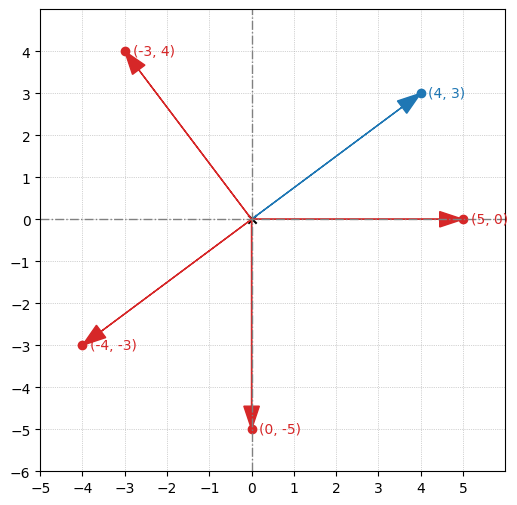

u=(4, 3), v=(5, 0), |v|=5.0, u·v=20
u=(4, 3), v=(-3, 4), |v|=5.0, u·v=0
u=(4, 3), v=(0, -5), |v|=5.0, u·v=-15
u=(4, 3), v=(-4, -3), |v|=5.0, u·v=-25


In [22]:
from common.vector import dot, length
from draw.component import Arrow2D, Color, Points2D, draw2d

# 定义 u 向量和 v 向量
u = (4, 3)

v1, v2, v3, v4 = (5, 0), (-3, 4), (0, -5), (-4, -3)

# 绘制各个向量
draw2d(
    [
        Points2D([u], color=Color.blue()),
        Arrow2D(u, color=Color.blue()),
        Points2D([v1], color=Color.red()),
        Arrow2D(v1, color=Color.red()),
        Points2D([v2], color=Color.red()),
        Arrow2D(v2, color=Color.red()),
        Points2D([v3], color=Color.red()),
        Arrow2D(v3, color=Color.red()),
        Points2D([v4], color=Color.red()),
        Arrow2D(v4, color=Color.red()),
    ]
)

# 遍历所有的 v 向量
for v in [v1, v2, v3, v4]:
    # 求向量长度
    l = length(v)
    # 求 v 向量和 u 向量的点积
    r = dot(u, v)

    # 输出向量长度和点积运算结果
    print(f"u={u}, v={v}, |v|={l}, u·v={r}")

# 可以看到, 由于每个 v 向量和 u 向量的角度不同, 所以尽管 v 向量的长度均为 5, 但和 u 向量的点积结果各不相同

**练习:** 找出长度为 `3` 的向量 $u$ 和长度为 `7` 的向量 $v$, 使 $u \cdot v=21$. 再找出一对向量 $u$ 和 $v$, 使 $u \cdot v=-21$. 最后, 再找出三对长度分别为 `3` 和 `7` 的向量, 并证明它们的长度都在 `-21` 和 `21` 之间

u=(3, 0), v=(7, 0)
|u|=3.0, |v|=7.0
u·v=21


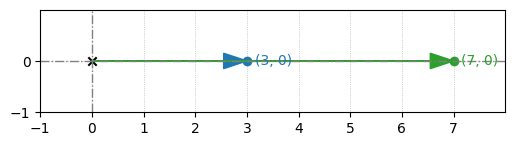

u=(0, 3), v=(0, -7)
|u|=3.0, |v|=7.0
u·v=-21


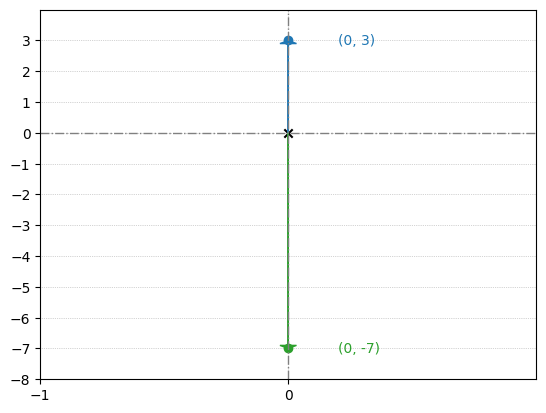

In [23]:
from common.vector import dot, length
from draw.component import Arrow2D, Color, Points2D, draw2d

# 定义向量
u, v = (3, 0), (7, 0)
print(f"u={u}, v={v}")

# 输出向量的长度
print(f"|u|={length(u)}, |v|={length(v)}")
# 输出向量的点积
print(f"u·v={dot(u, v)}")

# 绘制向量
draw2d(
    [
        Points2D([u], color=Color.blue()),
        Arrow2D(u, color=Color.blue()),
        Points2D([v], color=Color.green()),
        Arrow2D(v, color=Color.green()),
    ]
)

# 定义向量
u, v = (0, 3), (0, -7)
print(f"u={u}, v={v}")

# 输出向量的长度
print(f"|u|={length(u)}, |v|={length(v)}")
# 输出向量的点积
print(f"u·v={dot(u, v)}")

# 绘制向量
draw2d(
    [
        Points2D([u], color=Color.blue()),
        Arrow2D(u, color=Color.blue()),
        Points2D([v], color=Color.green()),
        Arrow2D(v, color=Color.green()),
    ],
    nice_aspect_ratio=False,
)

u=(-2.9996164259897933, -0.04797183478060682), v=(-4.965591512830102, 4.9338525441798184)
|u|=3.0, |v|=7.000000000000001, u·v=14.65818390755941


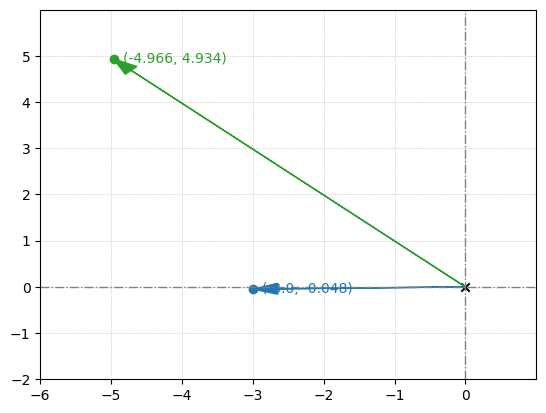

u=(-2.6321313167656237, 1.4394042973750165), v=(-6.892375915666058, 1.2227649966966103)
|u|=3.0000000000000004, |v|=6.999999999999999, u·v=19.901691685470624


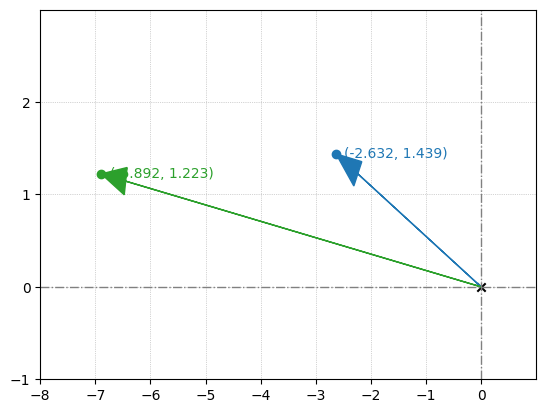

u=(-2.999871499371158, -0.02776665735447551), v=(2.160002637787706, 6.6584073624816735)
|u|=3.0, |v|=7.0, u·v=-6.664612067426408


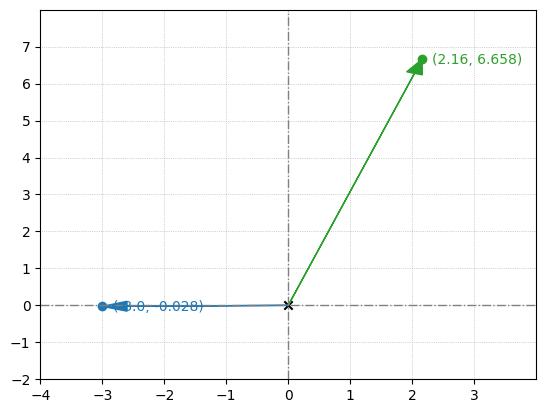

In [24]:
import math
import random

from common.typedef import Number, Vector2D
from common.vector import dot, length, to_cartesian
from draw.component import Arrow2D, Color, Points2D, draw2d


def random_vector_of_length(l: Number) -> Vector2D:
    """计算指定长度的随机二维向量

    利用极坐标, 可以以向量长度和任意角度, 计算指定长度的向量

    Args:
        `l` (`Number`): 向量长度

    Returns:
        `Vector2D`: 二维向量
    """
    # 根据 0~1 之间的随机数, 计算 360° 内的任意弧度, 得到极坐标
    # 根据极坐标, 转换为笛卡尔坐标
    return to_cartesian((l, 2 * math.pi * random.random()))


# 循环 3 次
for _ in range(3):
    # 生成长度为 3 的随机向量和 7 的随机向量
    u, v = random_vector_of_length(3), random_vector_of_length(7)
    print(f"u={u}, v={v}")

    # 输出向量的长度和点积
    print(f"|u|={length(u)}, |v|={length(v)}, u·v={dot(u, v)}")

    draw2d(
        [
            Points2D([u], color=Color.blue()),
            Arrow2D(u, color=Color.blue()),
            Points2D([v], color=Color.green()),
            Arrow2D(v, color=Color.green()),
        ],
        nice_aspect_ratio=False,
    )

# 对于长度 3 和 7 的两个向量, 最大值为 21, 表示两个向量方向相同; 最小值为 -21, 表示两个向量方向相反

### 1.2. 点积和角度

**知识:** 点积是根据两个向量的夹角而变化的

具体来说, 当夹角角度为 `0` 到 `180°` 时, 点积 $u \cdot v$ 的取值范围是 $u$ 和 $v$ 长度乘积的 `1` 到 `-1` 倍. 具有这样特征的函数, 即**余弦函数**

由此可以推导点积的另一个公式: 如果 $|u|$ 和 $|v|$ 分别表示向量 $u$ 和 $v$ 的长度, 那么点积的计算公式为: $u \cdot v = |u| \cdot |v| \cdot cos(\theta)$, $\theta$ 是向量 $u$ 和 $v$ 的夹角

原则上, 这提供了一种计算点积的新方法: 通过测量两个向量的**长度**和它们之间的**角度**, 就可以得到点积的结果

**练习:** 已知向量 $u = (-1, \sqrt{3})$ 和 $v= (\sqrt{4.5}, \sqrt{4.5})$ 长度分别为 `3` 和 `2`, 且它们的夹角是 $\theta=75°$

求向量的点积和 $|u| \cdot |v|\cdot cos(\theta)$ 的值

u=(-1, 1.7320508075688772), v=(2.1213203435596424, 2.1213203435596424)


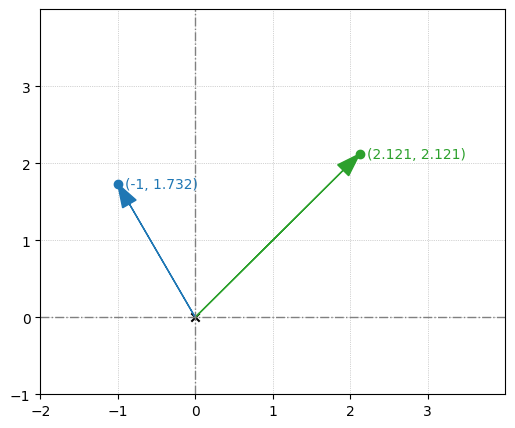

|u|=2.0, |v|=3.0, θ=1.309rad
|u|·|v|·cos(θ) = 1.552914270615124
u·v = 1.5529142706151244


In [25]:
import math

from common.vector import dot, length, to_radian
from draw.component import Arrow2D, Color, Points2D, draw2d

# 已知两个向量 u 和 v
u, v = (-1, math.sqrt(3)), (math.sqrt(4.5), math.sqrt(4.5))
print(f"u={u}, v={v}")

# 绘制向量
draw2d(
    [
        Points2D([u], color=Color.blue()),
        Points2D([v], color=Color.green()),
        Arrow2D(u, color=Color.blue()),
        Arrow2D(v, color=Color.green()),
    ]
)

# 已知向量夹角为 75°, 换算为弧度
rad = to_radian(75)

# 计算两个向量的长度
lu, lv = length(u), length(v)
print(f"|u|={round(lu, 3)}, |v|={round(lv, 3)}, θ={round(rad, 3)}rad")

# 计算向量长度的乘积和向量夹角的余弦值乘积
r1 = lu * lv * math.cos(rad)
print(f"|u|·|v|·cos(θ) = {r1}")

# 计算两个向量的点积
r2 = dot(u, v)
print(f"u·v = {r2}")

**练习:** 设 $u$ 和 $v$ 是向量, 其中 $|u|=3.61$, $|v|=1.44$. 如果 $u$ 和 $v$ 的夹角是 `101.3°`, 那么 $u \cdot v$ 是什么?

In [26]:
import math

from common.vector import to_radian

# 定义两个向量的长度
lu, lv = 3.61, 1.44

# 定义两个向量的角度
rad = to_radian(101.3)

print(f"|u|={lu}, |v|={lv}, θ={rad}rad")

# 计算向量的点积
r = lu * lv * math.cos(rad)
print(f"u·v={r}")

|u|=3.61, |v|=1.44, θ=1.7680185322702557rad
u·v=-1.0186064362303033


**知识:** 通过向量长度和向量夹角的角度即可计算点积, 反之, 通过向量点积和向量长度也可以求出两个向量的夹角

u=(-1, 1.7320508075688772), v=(2.1213203435596424, 2.1213203435596424)


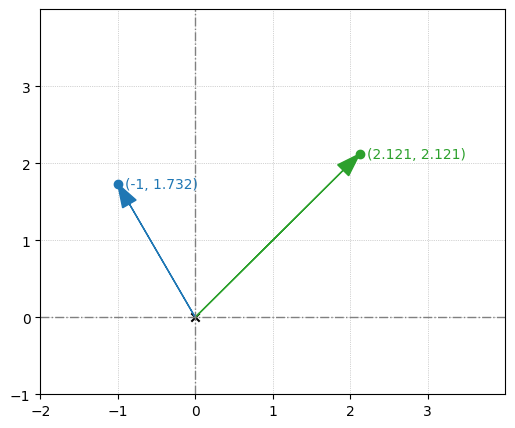

cos((u·v)/(|u|·|v|))=1.3089969389957472rad (75.0°)


In [27]:
import math

from common.vector import dot, length, to_degree
from draw.component import Arrow2D, Color, Points2D, draw2d

# 已知两个向量 u 和 v
u, v = (-1, math.sqrt(3)), (math.sqrt(4.5), math.sqrt(4.5))
print(f"u={u}, v={v}")

# 绘制向量
draw2d(
    [
        Points2D([u], color=Color.blue()),
        Points2D([v], color=Color.green()),
        Arrow2D(u, color=Color.blue()),
        Arrow2D(v, color=Color.green()),
    ]
)

# 求两个向量的点积
ruv = dot(u, v)

# 求两个向量长度的乘积
luv = length(u) * length(v)

# 获取两个向量夹角的弧度
rad = math.acos(ruv / luv)

# 将夹角弧度转为角度
degree = to_degree(rad)

# 输出角度
print(f"cos((u·v)/(|u|·|v|))={rad}rad ({degree}°)")

**知识:** 计算两个向量的夹角

In [28]:
import math
from common.typedef import Vector


def angle_between(v1: Vector, v2: Vector) -> float:
    """计算两个向量的夹角

    Args:
        `v1` (`Vector`): 向量 1
        `v2` (`Vector`): 向量 2

    Returns:
        `float`: 向量夹角的弧度
    """
    return math.acos(
        dot(v1, v2) / (length(v1) * length(v2)),
    )

**练习:** 计算 $u = (1, 2, 2)$ 和 $v = (2, 2, 1)$ 的向量夹角

向量夹角的计算不仅针对于二维向量有效, 实际上对 `N` 维向量也是有效的 (例如对于三维向量)

u=(1, 2, 2), v=(2, 2, 1)


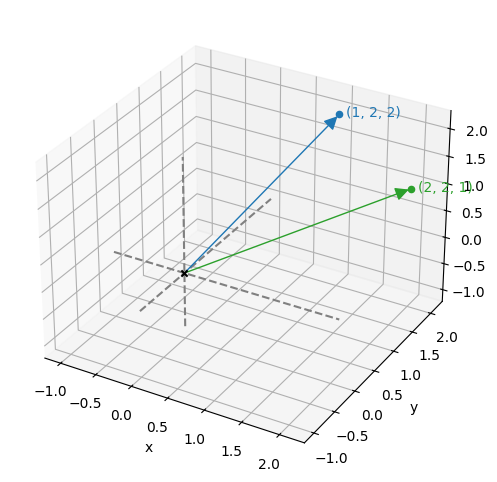

θ=0.5rad (27.3)


In [29]:
from common.vector import angle_between, to_degree
from draw.component import Arrow3D, Color, Points3D, draw3d

# 定义两个三维向量
u, v = (1, 2, 2), (2, 2, 1)
print(f"u={u}, v={v}")

# 绘制三维向量
draw3d(
    [
        Points3D([u], color=Color.blue()),
        Arrow3D(u, color=Color.blue()),
        Points3D([v], color=Color.green()),
        Arrow3D(v, color=Color.green()),
    ]
)

# 计算两个向量夹角的弧度
rad = angle_between(u, v)

# 弧度转角度
degree = to_degree(rad)

# 输出向量夹角的弧度和角度
print(f"θ={round(rad, 1)}rad ({round(degree, 1)})")

**练习:** `(1, 1, 1)` 与 `(-1, -1, 1)` 之间的角是多少度

In [30]:
from common.vector import length, to_degree, angle_between

# 定义两个向量
u, v = (1, 1, 1), (-1, -1, 1)
print(f"u={u}, v={v}")

rad = angle_between(u, v)

# 计算向量的夹角角度
print(f"θ={round(rad, 2)}rad ({round(to_degree(rad), 2)}°)")

u=(1, 1, 1), v=(-1, -1, 1)
θ=1.91rad (109.47°)


**练习:** 通过把 `(3, 4)` 和 `(4, 3)` 转换为极坐标并取角的差值, 来求出它们之间的角度

In [31]:
from common.vector import angle_between, to_degree, to_polar

# 定义两个向量
u, v = (3, 4), (4, 3)
print(f"u={u}, v={v}")

# 将向量从笛卡尔坐标转为极坐标
pu = to_polar(u)
pv = to_polar(v)

# 输出极坐标角度差, 即为两个向量的夹角
print(f"{pu[1] - pv[1]}")

# 计算两个向量的夹角
print(f"{angle_between(u, v)}")

u=(3, 4), v=(4, 3)
0.2837941092083278
0.283794109208328


### 1.3. 向量积

和点积不同, 向量积在三维之下的坐标体系并无实际意义, 需要应用在三维及以上的坐标系统上

如前所述, 向量积以两个三维向量 $u$ 和 $v$ 作为输入, 其输出 $u \times v$ 是另一个三维向量

向量积与点积的相似之处在于, 输入向量的长度和相对方向决定了输出; 不同之处在于, 向量积的输出不仅有大小, 还有方向

**知识:** 计算三维向量的向量积

向量积的公式为: $u \times v = (u_{y}v_{z} - u_{z}v_{y}, u_{z}v_{x} - u_{x}v_{z}, u_{x}v_{y} - u_{y}v_{x})$

> 虽然可以将其坐标设置成 $u=(a, b, c)$ 和 $v=(d, e, f)$, 但是使用更好的符号会更清楚: $u=(u_{x}, u_{y}, u_{z})$ 和 $v=(v_{x}, v_{y}, v_{z})$. 比起用 `a`, `b`, `c` 这样的任意字母来称呼它, 记住 $u_{x}$ 是 $v$ 的 $x$ 坐标更加容易

In [32]:
from common.typedef import Vector3D


def cross(u: Vector3D, v: Vector3D) -> Vector3D:
    """计算三维向量的向量积

    这个公式不能很好地推广到其他维度. 它要求输入向量必须有三个分量

    Args:
        `u` (`Vector3D`): 三维向量 1
        `v` (`Vector3D`): 三维向量 2

    Returns:
        `Vector3D`: 两个三维向量的向量积
    """
    ux, uy, uz = u
    vx, vy, vz = v
    return (uy * vz - uz * vy, uz * vx - ux * vz, ux * vy - uy * vx)

**知识:** $xy$ 平面内任意两个向量的向量积都位于 $z$ 轴上

这也是向量积不适用于二维坐标系统的原因: 二维坐标系统的向量积结果是在 $z$ 轴上

u=(1, 0, 0), v=(0, 1, 0)
u*v=(0, 0, 1)


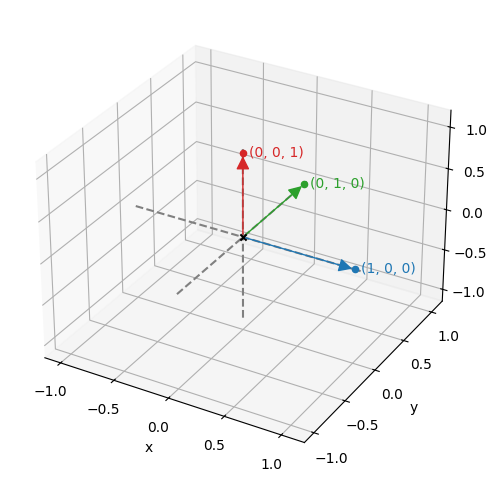

In [33]:
from common.vector import cross
from draw.component import Arrow3D, Color, Points3D, draw3d

# 定义两个三维向量, u 在 x 轴上, v 在 y 轴上
u, v = (1, 0, 0), (0, 1, 0)
print(f"u={u}, v={v}")

# 计算向量积
uv = cross(u, v)
print(f"u*v={uv}")

# 绘制向量积结果
draw3d(
    [
        Points3D([u], color=Color.blue()),
        Arrow3D(u, color=Color.blue()),
        Points3D([v], color=Color.green()),
        Arrow3D(v, color=Color.green()),
        Points3D([uv], color=Color.red()),
        Arrow3D(uv, color=Color.red()),
    ]
)

**知识:** 向量积的输出总是同时垂直于两个输入

u=(1, -1, 2), v=(-2, 1, -2)
u*v=(0, -2, -1)


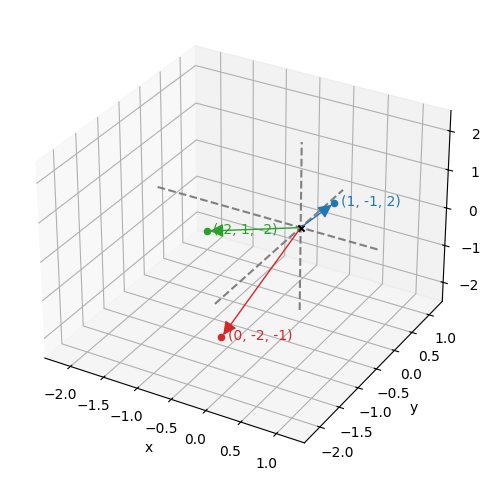

In [34]:
from common.vector import cross
from draw.component import Arrow3D, Color, Points3D, draw3d

# 定义两个任意向量
u, v = (1, -1, 2), (-2, 1, -2)
print(f"u={u}, v={v}")

# 计算向量积
uv = cross(u, v)
print(f"u*v={uv}")

# 绘制向量积结果
draw3d(
    [
        Points3D([u], color=Color.blue()),
        Arrow3D(u, color=Color.blue()),
        Points3D([v], color=Color.green()),
        Arrow3D(v, color=Color.green()),
        Points3D([uv], color=Color.red()),
        Arrow3D(uv, color=Color.red()),
    ]
)

**练习:** 用代数法证明 $u \times v$ 垂直于 $u$ 和 $v$, 不管 $u$ 和 $v$ 的坐标是多少

**提示:** 将 $(u \times v) \cdot u$ 和 $(u \times v) \cdot v$ 展开成坐标用于证明

**解:** 在下面的方程中, 设 $u=(u_{x}, u_{y}, u_{z})$, $v=(v_{x}, v_{y}, v_{z})$. 可以将 $(u \times v) \cdot u$ 用如下的坐标方式表示, 把向量积展开成坐标, 并进行点积运算

$u \times v = (u_{y}v_{z} - u_{z}v_{y}, u_{z}v_{x} - u_{x}v_{z}, u_{x}v_{y} - u_{y}v_{x}) \cdot (u_{x}, u_{y}, u_{z})$

在继续展开点积后, 我们看到共有 `6` 项, 每一项都能与另一项抵消

$\begin{aligned}
&=(u_{y}v_{z}-u_{z}v_{y})u_{x} + (u_{z}v_{x} - u_{x}v_{z})u_{y} + (u_{x}v_{y}-u_{y}v_{x})u_{z} \\ 
&=u_{y}v_{z}u_{x} - u_{z}v_{y}u_{x} + u_{x}v_{z}u_{y} - u_{x}v_{z}u_{y} + u_{x}v_{y}u_{z} - u_{y}v_{x}u_{z}
\end{aligned}$

因为完全展开后, 所有项都被抵消了, 所以结果是零. 这里不再展示 $(u \times v) \cdot v$ 的结果, 但情况仍不变: 出现了 `6` 个项并相互抵消, 结果为零. 这意味着 $(u \times v)$ 垂直于 $u$ 和 $v$

**练习:** 使用 `cross` 函数计算 $(0, 0, 1) \times v$, 其中第二个向量 $v$ 是几个不同的值. 每个结果的 $z$ 坐标是多少, 为什么?

根据向量积公式: $u \times v = (u_{y}v_{z} - u_{z}v_{y}, u_{z}v_{x} - u_{x}v_{z}, u_{x}v_{y} - u_{y}v_{x})$

因为 $u=(0, 0, 1)$, 所以 $u_{x}$ 和 $u_{y}$ 都是零. 这意味着不管 $v_{x}$ 和 $v_{y}$ 的值是多少, 向量积公式中的 $u_{x}v_{y}-u_{y}v_{x}$ 都是零

从几何学上讲, 这是有意义的: 向量积应该垂直于两个输入, 并且垂直于 $u = (0, 0, 1)$, $z$ 分量必须为零

u=(0, 0, 1), v=(1, 2, 3), u*v=(-2, 1, 0)
u=(0, 0, 1), v=(-1, -1, 0), u*v=(1, -1, 0)
u=(0, 0, 1), v=(1, -1, 5), u*v=(1, 1, 0)


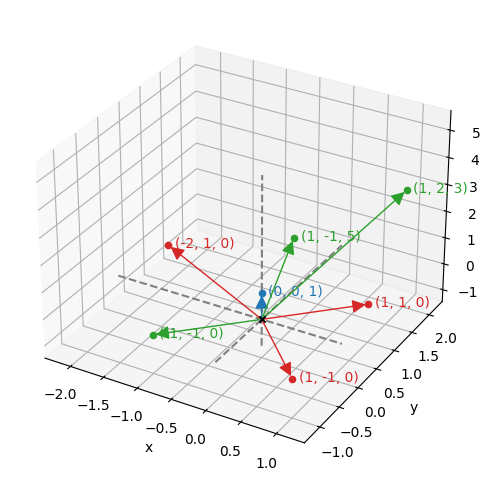

In [35]:
from common.vector import cross
from draw.component import Arrow3D, Color, Points3D, draw3d

# 定义向量 u
u = (0, 0, 1)
# 定义向量 v 集合
vs = [(1, 2, 3), (-1, -1, 0), (1, -1, 5)]

# 定义绘图对象
objs = [
    Points3D([u], color=Color.blue()),
    Arrow3D(u, color=Color.blue()),
]

# 遍历所有的 v 向量
for v in vs:
    # 计算向量积
    uv = cross(u, v)
    print(f"u={u}, v={v}, u*v={uv}")

    # 定义绘图对象
    objs += [
        Points3D([v], color=Color.green()),
        Arrow3D(v, color=Color.green()),
        Points3D([uv], color=Color.red()),
        Arrow3D(uv, color=Color.red()),
    ]

# 绘制结果
draw3d(objs)

**知识:** 右手原则, 可以将右手食指指向向量 $u$ 的方向, 将三指弯向向量 $v$, 拇指指向的就是 $u \times v$ 的方向

![X](../assets/right_hand.jpg)

**练习:** 向量 $(0, 0, 3) \times (0, -2, 0)$ 的结果指向什么方向

利用右手原则, 把右手食指指向 $(0, 0, 3)$, 也就是 $z$ 轴正方向, 三指指向 $(0, -2, 0)$, 即 $y$ 轴负方向, 则大拇指会指向 $x$ 轴正方向

因此, $(0, 0, 3) \times (0, -2, 0)$ 的结果 $(6, 0, 0)$ 指向 $x$ 轴正方向

u=(0, 0, 3), v=(0, -2, 0)
u*v=(6, 0, 0)


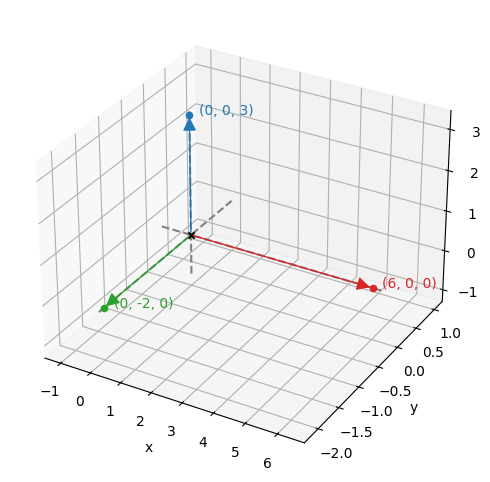

In [36]:
from common.vector import cross
from draw.component import Arrow3D, Color, Points3D, draw3d

# 定义向量
u, v = (0, 0, 3), (0, -2, 0)
print(f"u={u}, v={v}")

# 计算向量积
uv = cross(u, v)
print(f"u*v={uv}")

# 绘制向量积结果
draw3d(
    [
        Points3D([u], color=Color.blue()),
        Arrow3D(u, color=Color.blue()),
        Points3D([v], color=Color.green()),
        Arrow3D(v, color=Color.green()),
        Points3D([uv], color=Color.red()),
        Arrow3D(uv, color=Color.red()),
    ]
)

**练习:** 向量积 $(1, 0, 1) \times (-1, 0, 0)$ 的结果是什么? (通过几何方法求解)

这些向量位于 $xy$ 平面, 所以它们的向量积在 $y$ 轴上

将右手食指指向 $(1, 0, 1)$ 的方向, 并将三指向 $(-1, 0, 0)$ 方向弯曲, 则拇指会指向 $y$ 轴负方向

可以求出向量的长度和它们之间的夹角, 从而得到向量积的大小, 但已经可以从坐标中得到了底长和高. 因为它们都是 `1`, 所以长度也是 `1`. 因此, 向量积为 $(0, -1, 0)$, 它是 $y$ 轴负方向上长度为 `1` 的向量

u=(1, 0, 1), v=(-1, 0, 0)
u*v=(0, -1, 0)


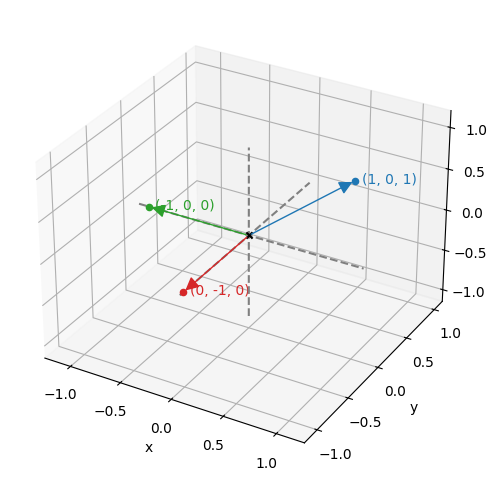

In [37]:
from common.vector import cross
from draw.component import Arrow3D, Color, Points3D, draw3d

# 定义向量
u, v = (1, 0, 1), (-1, 0, 0)
print(f"u={u}, v={v}")

# 计算向量积
uv = cross(u, v)
print(f"u*v={uv}")

# 绘制向量积结果
draw3d(
    [
        Points3D([u], color=Color.blue()),
        Arrow3D(u, color=Color.blue()),
        Points3D([v], color=Color.green()),
        Arrow3D(v, color=Color.green()),
        Points3D([uv], color=Color.red()),
        Arrow3D(uv, color=Color.red()),
    ]
)

**知识:** 向量积的长度等于一个平行四边形的面积

向量积也是一个向量, 其长度等于被运算的两个向量围成的平行四边形面积, 向量积测量的并不是两个向量的对齐程度, 而更像是“向量的垂直程度”. 更准确地说, 它告诉我们两个输入之间的面积有多大

![X](../assets/length_of_cross.jpg) ![X](../assets/rhomboid.jpg)

即: 以 $u$ 和 $v$ 为边的平行四边形的面积等于向量积 $u \times v$ 的长度
- 对于给定长度的两个向量, 在它们垂直时张成的面积最大
- 如果 $u$ 和 $v$ 在同一方向上, 则张不成任何面积, 向量积的长度为零
- 如果两个输入向量平行, 则不存在唯一的垂直方向

可以利用平行四边形的几何计算公式计算向量积: $|u| \cdot |v| \cdot sin(\theta)$

**练习:** 通过平行四边形面积公式计算特定向量的向量积

对于向量 $u=(0, 2, 0)$ 和 $v=(0, 0, -2)$, 可知 $u$ 位于 $y$ 轴正方形, $v$ 位于 $z$ 轴负方向, 利用右手原则 (食指指向 $u$, 三指指向 $v$, 则大拇指指向 $u \times v$), 所以 $u \times v$ 在 $x$ 轴负方向

通过公式 $|u| \cdot |v| \cdot sin(\theta)$ 可得结果为 `4.0`, 即 $u \times v$ 的长度, 再结合向量积在 $x$ 轴负方向的前提, 可知向量积结果为 $(-4, 0, 0)$

u=(0, 2, 0), v=(0, 0, -2)
u*v=(-4, 0, 0), |u*v|=4.0
θ=1.57rad (90.0°)
|u| * |v| * sin(θ)=4.0


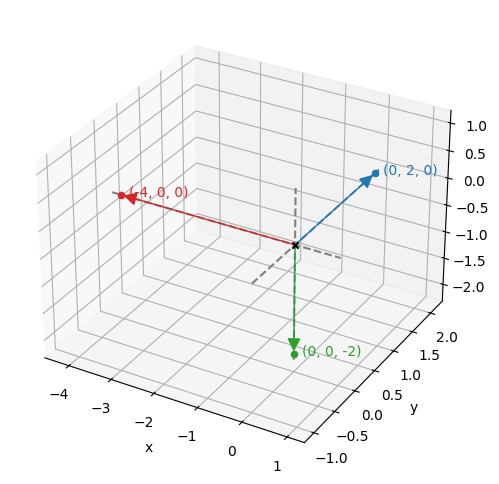

In [38]:
import math

from common.vector import angle_between, cross, length, to_degree
from draw.component import Arrow3D, Color, Points3D, draw3d

# 定义向量
u, v = (0, 2, 0), (0, 0, -2)
print(f"u={u}, v={v}")

# 计算向量积
uv = cross(u, v)
print(f"u*v={uv}, |u*v|={length(uv)}")

# 计算向量的夹角
rad = angle_between(u, v)
print(f"θ={round(rad, 2)}rad ({to_degree(rad)}°)")

# 计算向量长度
lu, lv = length(u), length(v)
# 利用三角公式计算向量积长度
print(f"|u| * |v| * sin(θ)={lu * lv * math.sin(rad)}")

# 绘制向量积
draw3d(
    [
        Points3D([u], color=Color.blue()),
        Arrow3D(u, color=Color.blue()),
        Points3D([v], color=Color.green()),
        Arrow3D(v, color=Color.green()),
        Points3D([uv], color=Color.red()),
        Arrow3D(uv, color=Color.red()),
    ]
)